In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Convolutional Neural Networks (CNNs)

A convolutional NN is a network that contains one or more convolutional layers.  A convolutional layer allows the network to process spatial patterns (e.g., identify items within an image).  For this reason, CNNs are commonly used for image identification and computer vision.

The challenges with images is that there is often a lot going on: what should the network focus on?  CNNs simplify images, converting them into the main lines or features.  That simplified pattern is then fed into a more traditional neural network, which identifies the pattern.

The following is a typical architecture for CNNs:
1. Conv2D
1. MaxPooling2D
1. Dropout
1. Flatten
1. Dense
1. Dropout
1. Dense NN that uses Softmax (for >2 categories)

The convolutional layer applies a filter to a 3x3 collection of pixels.  This process *convolutes* or reshapes the image into something simpler.  For a 3 channel image, the convolution process converts the image into a black and white image.

Max pooling simplifies the image even further by using only the maximum value within a 2x2 window.  This step further reduces image complexity by reducing its size, which speeds computation.

Flatten converts the 2D image data into 1D.  This step prepares the data for the NN.

After Flatten is our traditional NN, which will identify the patterns, apply softmax, and make the final prediction.

For an intuitive understanding of how CNNs work, check out this website:
<a href="https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/">An Intuitive Explanation of CNNs.</a>

* 0 airplane
* 1 automobile
* 2 bird
* 3 cat
* 4 deer
* 5 dog
* 6 frog
* 7 horse
* 8 ship
* 9 truck

## Import Keras Libaries and Import the CIFAR dataset

In [10]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

In [11]:
import keras
print(keras.__version__)

2.13.1


## Set up Parameter values for the Network

In [12]:
OPTIM = RMSprop()

In [13]:
import numpy as np
# Load data: this loads the data: may take a few minutes!
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Sample 1% of the cifar10 data to save time
idx = np.random.choice(np.arange(X_train.shape[0]), 500, replace=False)
X_train = X_train[idx]
y_train = y_train[idx]
idx = np.random.choice(np.arange(X_test.shape[0]), 100, replace=False)
X_test = X_test[idx]
y_test = y_test[idx]
y_train = np.reshape(y_train,(500,))
y_test = np.reshape(y_test,(100,))
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

500 train samples
100 test samples


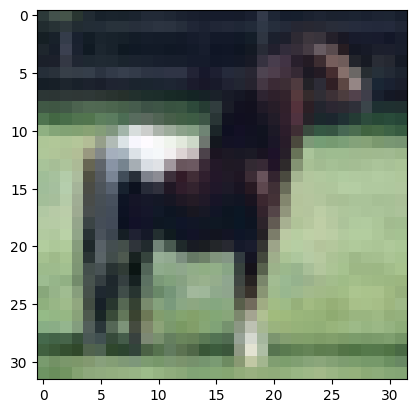

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# get a row data
data = X_train[0, :]

# Fortran-like indexing order (x-axis, y-axis , Red Blue Greeen (RGB Value)
data = np.reshape(data, (32,32,3), order='F' )
plt.imshow(data)

## Change y to binary variables

In [17]:
import pandas as pd
y_train_binaries = pd.get_dummies(y_train)
y_test_binaries = pd.get_dummies(y_test)

## Configure Network

The following code creates a convolutional layer, with a 3,3 convolutional filters

### Difference between Valid and Same Padding

When padding == "VALID", the input image is not padded. This means that the filter window always stays inside the input image.  This type of padding is called valid because for this padding only the valid and original elements of the input image are considered. When padding == "VALID", there can be a loss of information. Generally, elements on the right and the bottom of the image tend to be ignored. How many elements are ignored depends on the size of the kernel and the stride.

When padding == “SAME”, the input is half padded. The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.


Number of filters is always in the form of 2^n, here we have taken 32

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', \
    input_shape = (32,32,3)))
model.add(Activation('relu'))

# Reduce the number of channels of the image (to black and white)
# take the maximum value within a block
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

Prepare image data for the NN: convert 2D to 1D

In [19]:
model.add(Flatten())

model.add(Dense(100, activation = 'relu', name='first_hidden'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, activation = 'relu', name='second_hidden'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100, activation = 'relu', name='third_hidden'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100, activation = 'relu', name='fourth_hidden'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax', name='output'))
#if binary layer activation use: Sigmoid

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 first_hidden (Dense)        (None, 100)               819300    
                                                        

Train the model

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, \
             metrics=['accuracy'])
history = model.fit(X_train, y_train_binaries, batch_size=128, epochs=20, \
         validation_split=0.2, verbose=1)

Epoch 1/20
4/4 [==============================] - 5s 186ms/step - loss: 3.1248 - accuracy: 0.1175 - val_loss: 6.9572 - val_accuracy: 0.1400
Epoch 2/20
4/4 [==============================] - 0s 75ms/step - loss: 2.9153 - accuracy: 0.0900 - val_loss: 3.8181 - val_accuracy: 0.1100
Epoch 3/20
4/4 [==============================] - 0s 68ms/step - loss: 2.5422 - accuracy: 0.1750 - val_loss: 3.3832 - val_accuracy: 0.1500
Epoch 4/20
4/4 [==============================] - 0s 65ms/step - loss: 2.3340 - accuracy: 0.2350 - val_loss: 3.4034 - val_accuracy: 0.1000
Epoch 5/20
4/4 [==============================] - 0s 66ms/step - loss: 2.3113 - accuracy: 0.2350 - val_loss: 3.0329 - val_accuracy: 0.1200
Epoch 6/20
4/4 [==============================] - 0s 69ms/step - loss: 2.2433 - accuracy: 0.2400 - val_loss: 3.3047 - val_accuracy: 0.1200
Epoch 7/20
4/4 [==============================] - 0s 70ms/step - loss: 2.1955 - accuracy: 0.2825 - val_loss: 2.8671 - val_accuracy: 0.1500
Epoch 8/20
4/4 [==========

Evaluate the Keras Model

In [21]:
# evaluate the keras model
loss, accuracy = model.evaluate(X_train, y_train_binaries)
print('\n\nTrain Loss: %.2f' % (loss))
print('Train Accuracy: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 9ms/step - loss: 2.0473 - accuracy: 0.2200


Train Loss: 2.05
Train Accuracy: 22.00


Test the model

In [22]:
loss, accuracy = model.evaluate(X_test, y_test_binaries)
print('\n\nTest Loss: %.2f' % (loss))
print('Test Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 8ms/step - loss: 2.0534 - accuracy: 0.2800


Test Loss: 2.05
Test Accuracy: 28.00


Categories:
* 0 airplane
* 1 automobile
* 2 bird
* 3 cat
* 4 deer
* 5 dog
* 6 frog
* 7 horse
* 8 ship
* 9 truck

Prediction Model

In [23]:
prob_prediction_train = model.predict(X_train)
predict_classes_train = np.argmax(prob_prediction_train,axis=1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,predict_classes_train)
#numbers present on diagnol are true predictions others are false

16/16 [==============================] - 0s 14ms/step


array([[22,  1,  0,  0,  0,  0, 15,  3,  1,  5],
       [ 2,  3,  0,  0,  0,  0, 46,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  0, 38,  2,  0,  0],
       [ 0,  0,  0,  2,  0,  0, 44,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0, 44,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37, 10,  0,  0],
       [17,  0,  0,  0,  0,  1, 26,  0,  8,  4],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  6]])

## Plot results

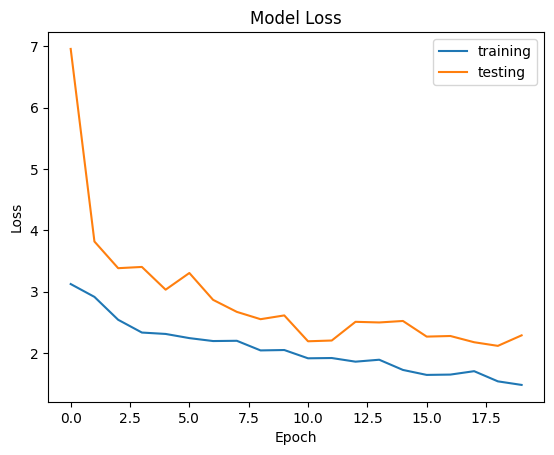

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Predict a New Image

In [25]:
categories = ['airplane', 'automobile', 'bird', 'cat', \
              'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
# make a prediction for a new image.
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
import numpy as np
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    return img

# load an image and predict the class
img = load_image('/content/drive/MyDrive/Colab Notebooks/MISY436_636/18-Convolutional Neural Networks Coding Session/dexter2.jpg')
# predict the class
predict_x=model.predict(img)
classes_x=np.argmax(predict_x,axis=1)
result = classes_x[0]
print('Predicted Category: ' + str(categories[result]))

1/1 [==============================] - 0s 153ms/step
Predicted Category: frog


Categories:
* 0 airplane
* 1 automobile
* 2 bird
* 3 cat
* 4 deer
* 5 dog
* 6 frog
* 7 horse
* 8 ship
* 9 truck

In [27]:
# load an image and predict the class
img = load_image('/content/drive/MyDrive/Colab Notebooks/MISY436_636/18-Convolutional Neural Networks Coding Session/mustang2.jpg')
# predict the class
predict_x=model.predict(img)
classes_x=np.argmax(predict_x,axis=1)
result = classes_x[0]
print('Predicted Category: ' + str(categories[result]))

1/1 [==============================] - 0s 25ms/step
Predicted Category: frog


In [28]:
# load an image and predict the class
img = load_image('/content/drive/MyDrive/Colab Notebooks/MISY436_636/18-Convolutional Neural Networks Coding Session/boats2.jpg')
# predict the class
predict_x=model.predict(img)
classes_x=np.argmax(predict_x,axis=1)
result = classes_x[0]
print('Predicted Category: ' + str(categories[result]))

1/1 [==============================] - 0s 18ms/step
Predicted Category: frog


In [29]:
# load an image and predict the class
img = load_image('/content/drive/MyDrive/Colab Notebooks/MISY436_636/18-Convolutional Neural Networks Coding Session/chicken2.jpg')
# predict the class
predict_x=model.predict(img)
classes_x=np.argmax(predict_x,axis=1)
result = classes_x[0]
print('Predicted Category: ' + str(categories[result]))

1/1 [==============================] - 0s 25ms/step
Predicted Category: frog


In [30]:
# load an image and predict the class
img = load_image('/content/drive/MyDrive/Colab Notebooks/MISY436_636/18-Convolutional Neural Networks Coding Session/truck2.jpg')
# predict the class
predict_x=model.predict(img)
classes_x=np.argmax(predict_x,axis=1)
result = classes_x[0]
print('Predicted Category: ' + str(categories[result]))

1/1 [==============================] - 0s 32ms/step
Predicted Category: frog


In [31]:
# load an image and predict the class
img = load_image('/content/drive/MyDrive/Colab Notebooks/MISY436_636/18-Convolutional Neural Networks Coding Session/semitruck2.jpg')
# predict the class
predict_x=model.predict(img)
classes_x=np.argmax(predict_x,axis=1)
result = classes_x[0]
print('Predicted Category: ' + str(categories[result]))

1/1 [==============================] - 0s 21ms/step
Predicted Category: frog
